In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings("ignore")

In [49]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [50]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

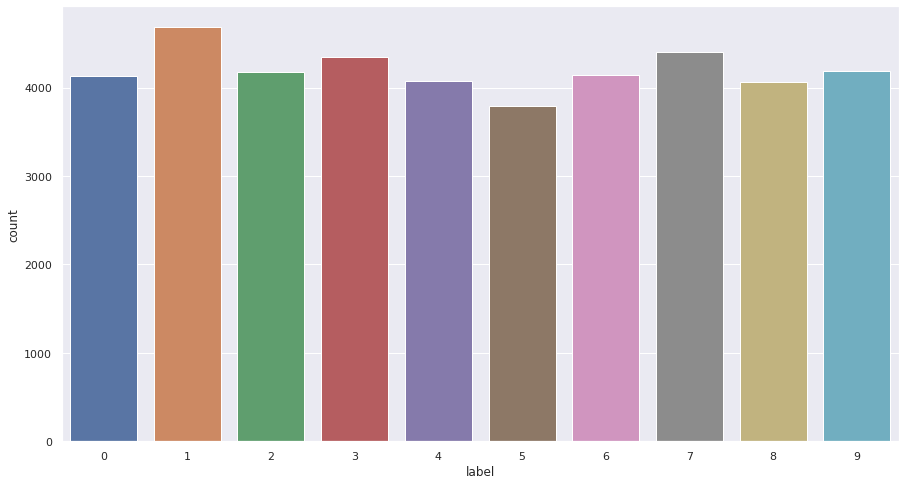

In [54]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='label', data=train)

In [55]:
Y_train.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [56]:
X_train.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [57]:
test.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [58]:
train=train.dropna()
X_train = train.iloc[:,1:].values
Y_train = train.iloc[:,0].values
X_train.shape,Y_train.shape

((42000, 784), (42000,))

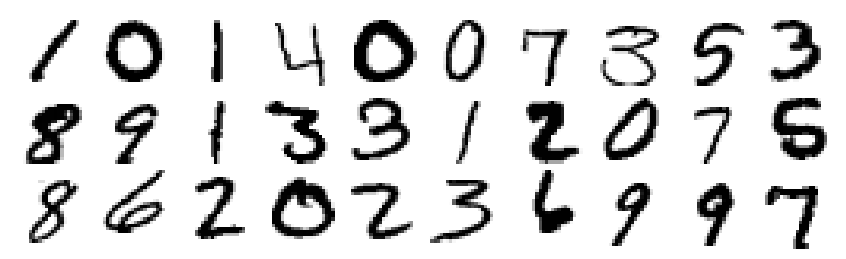

In [59]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [60]:
test=test.dropna()
test=test.values
test.shape


(28000, 784)

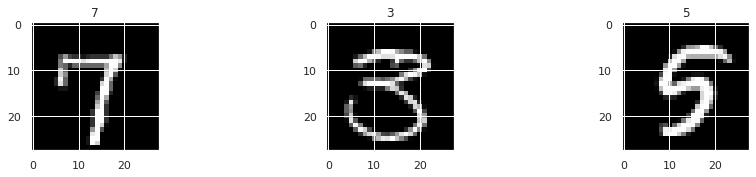

In [61]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(Y_train[i]);

In [62]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

In [63]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [64]:
Y_train


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

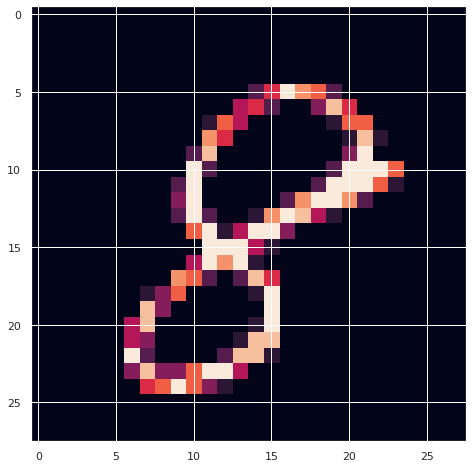

In [66]:
g = plt.imshow(X_train[0][:,:,0])

In [67]:
cnn=tf.keras.models.Sequential()

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding = 'Same',activation='relu',input_shape = (28,28,1)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding = 'Same',activation='relu'))

In [69]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.25))

In [70]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

In [71]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

In [72]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.25))

In [73]:
cnn.add(tf.keras.layers.Flatten())

In [74]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [75]:
cnn.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [76]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [77]:
cnn.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [78]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [79]:
epochs = 100
batch_size = 64

In [80]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 


datagen.fit(X_train)

In [ ]:
model = cnn.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/100
590/590 - 12s - loss: 0.3739 - accuracy: 0.8792 - val_loss: 0.0523 - val_accuracy: 0.9829 - lr: 0.0010 - 12s/epoch - 21ms/step
Epoch 2/100
590/590 - 10s - loss: 0.1231 - accuracy: 0.9621 - val_loss: 0.0438 - val_accuracy: 0.9886 - lr: 0.0010 - 10s/epoch - 18ms/step
Epoch 3/100
590/590 - 11s - loss: 0.0883 - accuracy: 0.9734 - val_loss: 0.0435 - val_accuracy: 0.9886 - lr: 0.0010 - 11s/epoch - 18ms/step
Epoch 4/100
590/590 - 11s - loss: 0.0806 - accuracy: 0.9770 - val_loss: 0.0279 - val_accuracy: 0.9907 - lr: 0.0010 - 11s/epoch - 18ms/step
Epoch 5/100
590/590 - 10s - loss: 0.0729 - accuracy: 0.9794 - val_loss: 0.0325 - val_accuracy: 0.9917 - lr: 0.0010 - 10s/epoch - 18ms/step
Epoch 6/100
590/590 - 10s - loss: 0.0749 - accuracy: 0.9796 - val_loss: 0.0313 - val_accuracy: 0.9907 - lr: 0.0010 - 10s/epoch - 18ms/step
Epoch 7/100
590/590 - 10s - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.0267 - val_accuracy: 0.9936 - lr: 0.0010 - 10s/epoch - 17ms/step
Epoch 8/100
590/590 - 10s -

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
# Predict the values from the validation dataset
Y_pred = cnn.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
test_pred = pd.DataFrame( cnn.predict([test]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

In [ ]:
test_pred.to_csv('submission1.csv', index = False)